#### Naive Bayes

In [4]:
%reload_ext autoreload
%autoreload 2

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from src.paths import TRANSFORMED_DATA_DIR
from src.split_and_tfidf import split_and_vect 

In [2]:
df = pd.read_parquet(TRANSFORMED_DATA_DIR / 'cleaned_sentiments.parquet')
df.head()

,recommended,cleaned
0,1,Very good flight following an equally good fli...
1,1,An hours delay due to late arrival of the inco...
2,0,I booked through BA because Loganair dont have...
3,0,British airways lost bags in LHR then found th...
4,0,The check in process and reward loyalty progra...


In [3]:
df_copy = df.copy()

In [5]:
# split the data and make a tfidf vectorizer
X_train_vec, X_test_vec, y_train, y_test, tfidf_vec = split_and_vect(df_copy, 'cleaned', 'recommended')

In [6]:
# naive bayes
from sklearn.naive_bayes import MultinomialNB

# instantiate model
nb = MultinomialNB()

# fit the model
nb.fit(X_train_vec, y_train)

# make predictions
y_pred = nb.predict(X_test_vec)

In [9]:
# metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       503
           1       0.98      0.16      0.27       276

    accuracy                           0.70       779
   macro avg       0.83      0.58      0.54       779
weighted avg       0.79      0.70      0.62       779



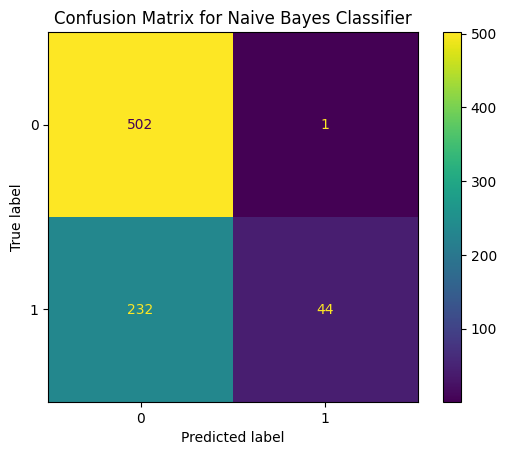

In [11]:
# confusion matrix
ConfusionMatrixDisplay.from_estimator(nb, X_test_vec, y_test)
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()